# 📝 **Objective of this Notebook**

The main goal of this notebook is to get more comfortable with using **Machine Learning (ML)** and especially **Deep Learning (DL)** algorithms for classification tasks. In this case, we will tackle the **MNIST dataset**, which contains handwritten digits (0-9), corresponding to 10 distinct classes.

---

# ⚙️ **Approach**

We will experiment with the following models:

1. **Logistic Regression** (Linear Model)  
2. **Random Forest** (Non-Linear Model)

Afterward, we explore deep learning approaches using basic **Neural Networks** architectures:

- **Fully Connected Neural Network (FCNN)**
- **Convolutional Neural Network (CNN)**

---

# 📊 **Model Comparison**

We begin by comparing the **4 models** using key performance metrics:

- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**

These metrics are particularly useful for evaluating multiclass classification tasks.

---

# 🔧 **Enhancements and Advanced Techniques**

Next, we explore a more complex **CNN architecture** with regularization techniques such as:

- **Dropout Layer**  
- **Label Smoothing** (via `nn.CrossEntropy()` loss function)

---

# ⚡ **Learning Rate Tuning**

Finally, we experiment with fine-tuning the **learning rate** and observe the loss function's behavior as we adjust it.


**Import Libraries**

In [22]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# For Logistic Regression & Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


Using device: cuda


**Load and Visualize MNIST Dataset**

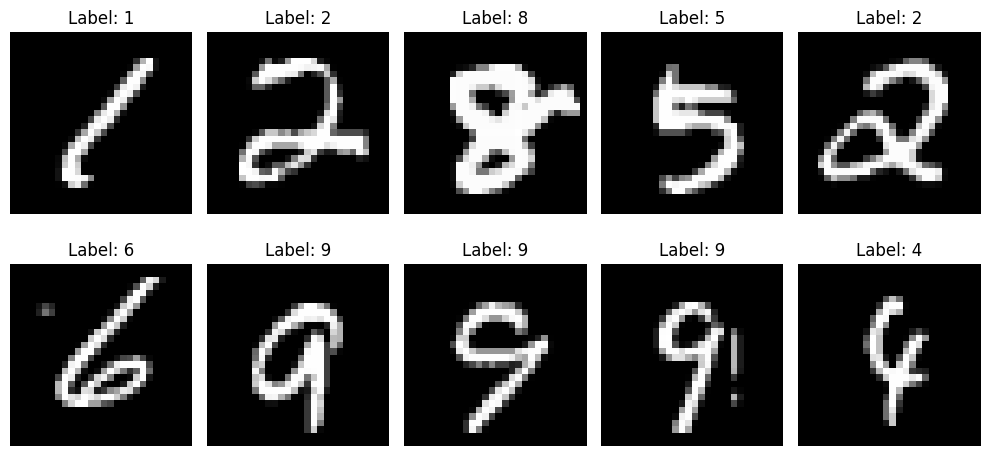

In [23]:
# Transform for normalization and tensor conversion
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Visualize sample images
examples = iter(train_loader)  # Create an iterator from the DataLoader
images, labels = next(examples)  # Use Python's `next()` function to get the first batch

# Plot the images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i][0].cpu().numpy(), cmap='gray')  # Convert tensor to numpy
    plt.title(f'Label: {labels[i].item()}')  # Convert label tensor to integer
    plt.axis('off')
plt.tight_layout()
plt.show()

**Prepare Data for Logistic Regression**

In [24]:
# Flatten images for Logistic Regression
X_train_lr = train_dataset.data.numpy().reshape(train_dataset.data.shape[0], -1) / 255.0
y_train_lr = train_dataset.targets.numpy()
X_test_lr = test_dataset.data.numpy().reshape(test_dataset.data.shape[0], -1) / 255.0
y_test_lr = test_dataset.targets.numpy()

# Confirm preprocessing
print(f"Shape of flattened training data: {X_train_lr.shape}")
print(f"Shape of flattened test data: {X_test_lr.shape}")

Shape of flattened training data: (60000, 784)
Shape of flattened test data: (10000, 784)


**Prepare Data for Random Forest**

In [25]:
# Flatten images for Random Forest
X_train_rf = train_dataset.data.numpy().reshape(train_dataset.data.shape[0], -1)
y_train_rf = train_dataset.targets.numpy()
X_test_rf = test_dataset.data.numpy().reshape(test_dataset.data.shape[0], -1)
y_test_rf = test_dataset.targets.numpy()

# Display shapes
print(f"Shape of flattened training data: {X_train_rf.shape}")
print(f"Shape of flattened test data: {X_test_rf.shape}")

Shape of flattened training data: (60000, 784)
Shape of flattened test data: (10000, 784)


**Train and Evaluate Logistic Regression**

In [26]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
lr_model.fit(X_train_lr, y_train_lr)

# Predictions and Evaluation
y_pred_lr = lr_model.predict(X_test_lr)

# Metrics
lr_metrics = {
    'Accuracy': accuracy_score(y_test_lr, y_pred_lr),
    'Precision': precision_score(y_test_lr, y_pred_lr, average='weighted'),
    'Recall': recall_score(y_test_lr, y_pred_lr, average='weighted'),
    'F1-Score': f1_score(y_test_lr, y_pred_lr, average='weighted')
}
print(f"Logistic Regression Metrics:\n{lr_metrics}")

Logistic Regression Metrics:
{'Accuracy': 0.9258, 'Precision': 0.9255867938696886, 'Recall': 0.9258, 'F1-Score': 0.9256219546738039}


**Train and Evaluate Random Forest**

In [27]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test_rf)

# Metrics
rf_metrics = {
    'Accuracy': accuracy_score(y_test_rf, y_pred_rf),
    'Precision': precision_score(y_test_rf, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test_rf, y_pred_rf, average='weighted'),
    'F1-Score': f1_score(y_test_rf, y_pred_rf, average='weighted')
}
print(f"Random Forest Metrics:\n{rf_metrics}")

Random Forest Metrics:
{'Accuracy': 0.9705, 'Precision': 0.970495753186874, 'Recall': 0.9705, 'F1-Score': 0.9704722695987773}


**Define Fully Connected Neural Network: FCNN**

In [28]:
class FullyConnectedNN(nn.Module):
    def __init__(self):
        super(FullyConnectedNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.fc(x)

**Define Simple CNN**

In [29]:
class simpleCNN(nn.Module):
    def __init__(self):
        super(simpleCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(32*13*13, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.cnn(x)

**Training and Evaluation Function for PyTorch Models**

In [30]:
def train_model(model, train_loader, test_loader, epochs, lr):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

    # Evaluate the model
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }
    return metrics

**Train Fully Connected NN**

In [31]:
fc_model = FullyConnectedNN()
fc_metrics = train_model(fc_model, train_loader, test_loader, epochs=10, lr=0.001)
print(f"Fully Connected NN Metrics:\n{fc_metrics}")

Epoch 1/10, Loss: 0.2111
Epoch 2/10, Loss: 0.1813
Epoch 3/10, Loss: 0.3034
Epoch 4/10, Loss: 0.1034
Epoch 5/10, Loss: 0.0244
Epoch 6/10, Loss: 0.0840
Epoch 7/10, Loss: 0.0091
Epoch 8/10, Loss: 0.0013
Epoch 9/10, Loss: 0.1513
Epoch 10/10, Loss: 0.0586
Fully Connected NN Metrics:
{'Accuracy': 0.9706, 'Precision': 0.971236360011354, 'Recall': 0.9706, 'F1-Score': 0.970682611845632}


**Train Simple CNN**

In [32]:
cnn_model = simpleCNN()
cnn_metrics = train_model(cnn_model, train_loader, test_loader, epochs=15, lr=0.001)
print(f"Simple CNN Metrics:\n{cnn_metrics}")

Epoch 1/15, Loss: 0.0157
Epoch 2/15, Loss: 0.1461
Epoch 3/15, Loss: 0.0009
Epoch 4/15, Loss: 0.0353
Epoch 5/15, Loss: 0.0055
Epoch 6/15, Loss: 0.1816
Epoch 7/15, Loss: 0.0865
Epoch 8/15, Loss: 0.0028
Epoch 9/15, Loss: 0.0084
Epoch 10/15, Loss: 0.0027
Epoch 11/15, Loss: 0.0024
Epoch 12/15, Loss: 0.0170
Epoch 13/15, Loss: 0.0002
Epoch 14/15, Loss: 0.0018
Epoch 15/15, Loss: 0.0001
Simple CNN Metrics:
{'Accuracy': 0.9865, 'Precision': 0.9865170329605009, 'Recall': 0.9865, 'F1-Score': 0.9865005376890643}


**Comapre models**

Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9258   0.925587  0.9258  0.925622
1        Random Forest    0.9705   0.970496  0.9705  0.970472
2   Fully Connected NN    0.9706   0.971236  0.9706  0.970683
3           Simple CNN    0.9865   0.986517  0.9865  0.986501


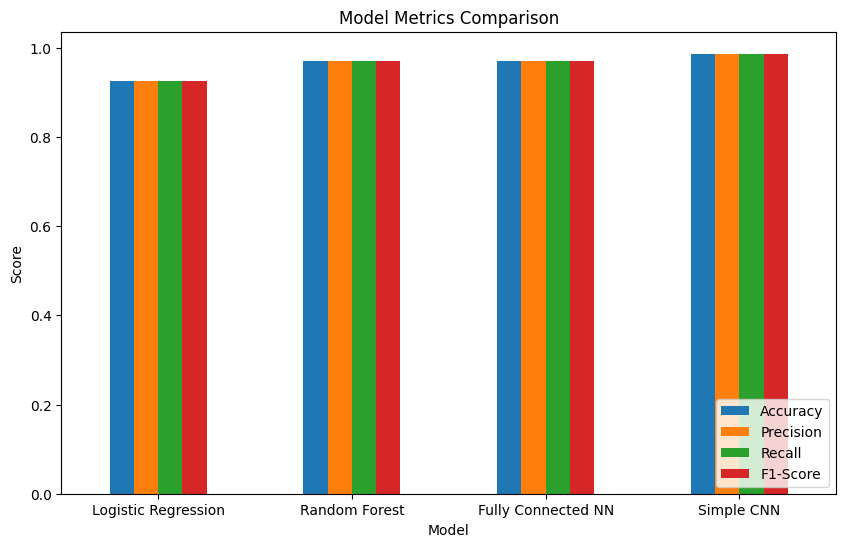

In [33]:
# Comparison table
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Fully Connected NN', 'Simple CNN'],
    'Accuracy': [lr_metrics['Accuracy'], rf_metrics['Accuracy'], fc_metrics['Accuracy'], cnn_metrics['Accuracy']],
    'Precision': [lr_metrics['Precision'], rf_metrics['Precision'], fc_metrics['Precision'], cnn_metrics['Precision']],
    'Recall': [lr_metrics['Recall'], rf_metrics['Recall'], fc_metrics['Recall'], cnn_metrics['Recall']],
    'F1-Score': [lr_metrics['F1-Score'], rf_metrics['F1-Score'], fc_metrics['F1-Score'], cnn_metrics['F1-Score']]
})

print("Model Comparison:")
print(comparison)

# Plot metrics
comparison.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Metrics Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# 🔍 **Performance Comparison**

As we observe, **Logistic Regression** shows the **least performance**, achieving around **92%** across all four metrics (accuracy, precision, recall, and F1-score). On the other hand, **Random Forest** and the **simple Fully Connected Neural Network (FCNN)** show **similar performance**, both reaching **97%** for all four metrics.

However, in terms of **execution time**:
- **Random Forest** took approximately **42 seconds**.
- **FCNN** took about **2 minutes**.

Given this, we can conclude that **Random Forest** is the most efficient among these three models in terms of execution time.

---

# 🏆 **CNN Performance**

Nevertheless, the **simple Convolutional Neural Network (CNN)** outperforms all the previous models, achieving an impressive **98.6%** across all four metrics. This highlights the potential of **Neural Networks** to surpass traditional **Machine Learning models**, even with a relatively simple architecture and a small number of parameters.

Furthermore, this demonstrates that **CNNs** are more effective at **extracting features from images** compared to **FCNNs**, which rely on fully connected layers and are not as specialized for image data.

---

# 🧑‍💻 **Model Architectures: FCNN vs CNN**

The architectures used for both the **Fully Connected Neural Network (FCNN)** and the **simple Convolutional Neural Network (CNN)** are relatively simple:

- The **FCNN** consists of fully connected layers that flatten the image and process it through only 3 linear layers.
- The **simple CNN** includes a single convolutional layer followed by pooling and two fully connected layers, which are better at extracting features from images.

These architectures demonstrate how even simple CNNs can outperform FCNNs due to their ability to capture spatial hierarchies in image data.


**Try a more complex CNN**

In [34]:
class complexCNN(nn.Module):
    def __init__(self):
        super(complexCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64*5*5, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.cnn(x)

In [35]:
cnn_model = complexCNN()
cnn_metrics = train_model(cnn_model, train_loader, test_loader, epochs=15, lr=0.001)
print(f"Complex CNN Metrics:\n{cnn_metrics}")

Epoch 1/15, Loss: 0.1366
Epoch 2/15, Loss: 0.0462
Epoch 3/15, Loss: 0.0700
Epoch 4/15, Loss: 0.0532
Epoch 5/15, Loss: 0.0318
Epoch 6/15, Loss: 0.0543
Epoch 7/15, Loss: 0.0309
Epoch 8/15, Loss: 0.0039
Epoch 9/15, Loss: 0.0405
Epoch 10/15, Loss: 0.0004
Epoch 11/15, Loss: 0.0060
Epoch 12/15, Loss: 0.0686
Epoch 13/15, Loss: 0.0061
Epoch 14/15, Loss: 0.0785
Epoch 15/15, Loss: 0.0013
Complex CNN Metrics:
{'Accuracy': 0.9936, 'Precision': 0.9936162617454558, 'Recall': 0.9936, 'F1-Score': 0.9935997255035233}


# 🚀 **Impressive Improvement with a Single Convolutional Layer**

It's impressive that by simply adding **one convolutional layer**, followed by **pooling**, we were able to outperform the **simple CNN** by **0.6%**, achieving a performance of **99.3%**.

While the gap may not seem large, it is still **considerable**, especially since we are already achieving very high performance. At this point, further improvements are harder to come by, making this gain even more noteworthy.


**Learning Rate Experimentation with CNN**


Training with learning rate: 0.1
Learning Rate: 0.1, Epoch 1/15, Loss: 4.1256
Learning Rate: 0.1, Epoch 2/15, Loss: 2.3094
Learning Rate: 0.1, Epoch 3/15, Loss: 2.3107
Learning Rate: 0.1, Epoch 4/15, Loss: 2.3102
Learning Rate: 0.1, Epoch 5/15, Loss: 2.3106
Learning Rate: 0.1, Epoch 6/15, Loss: 2.3100
Learning Rate: 0.1, Epoch 7/15, Loss: 2.3101
Learning Rate: 0.1, Epoch 8/15, Loss: 2.3100
Learning Rate: 0.1, Epoch 9/15, Loss: 2.3100
Learning Rate: 0.1, Epoch 10/15, Loss: 2.3103
Learning Rate: 0.1, Epoch 11/15, Loss: 2.3102
Learning Rate: 0.1, Epoch 12/15, Loss: 2.3097
Learning Rate: 0.1, Epoch 13/15, Loss: 2.3105
Learning Rate: 0.1, Epoch 14/15, Loss: 2.3104
Learning Rate: 0.1, Epoch 15/15, Loss: 2.3106

Training with learning rate: 0.01
Learning Rate: 0.01, Epoch 1/15, Loss: 0.4074
Learning Rate: 0.01, Epoch 2/15, Loss: 0.2922
Learning Rate: 0.01, Epoch 3/15, Loss: 0.2792
Learning Rate: 0.01, Epoch 4/15, Loss: 0.2746
Learning Rate: 0.01, Epoch 5/15, Loss: 0.2714
Learning Rate: 0.01,

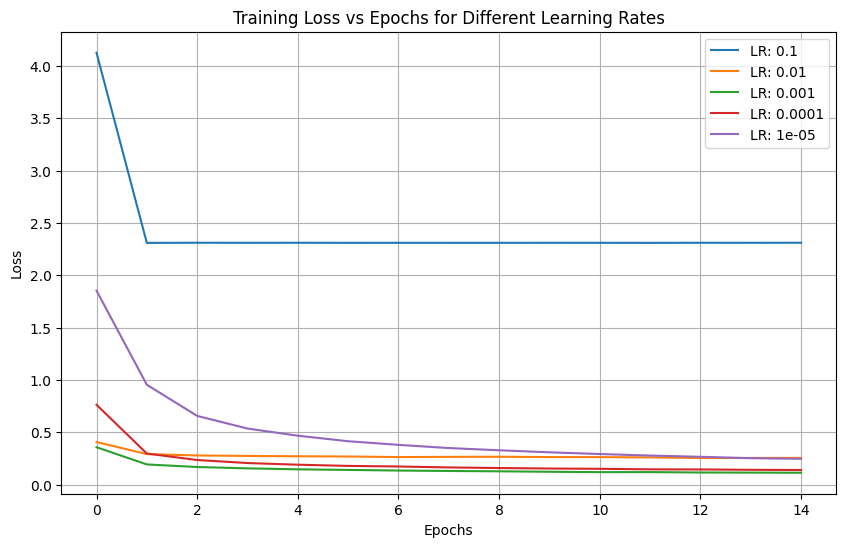

In [38]:
# Define function to train CNN with different learning rates
def train_cnn_with_lr(lr, epochs=15):
    model = complexCNN().to(device)  # Initialize a new CNN for each experiment
    criterion = nn.CrossEntropyLoss(label_smoothing=0.01)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Learning Rate: {lr}, Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    return train_losses

# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.001, 1e-4, 1e-5]
results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    results[lr] = train_cnn_with_lr(lr)

# Plot results
plt.figure(figsize=(10, 6))
for lr, losses in results.items():
    plt.plot(losses, label=f"LR: {lr}")
plt.title("Training Loss vs Epochs for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 🔍 **Learning Rate Experimentation**

As we observe here, for a learning rate **$lr=0.1$**, even though it's not arbitrarily high, the loss decreases until it stabilizes around **2.3**, indicating **no convergence**.

For learning rates **$lr \in \{ 1e-k \quad; \quad k = 2,3,4,5 \}$**, convergence is achieved. However, in terms of speed:
- The convergence is **fastest** at **$lr=0.01$**, followed by **$lr=0.001$**.
- As we reduce the learning rate further (to **$lr=1e-4$** and **$lr=1e-5$**), convergence slows down because smaller learning rates result in smaller steps in the **Stochastic Gradient Descent (SGD)** algorithm.

To conclude, the **best learning rate** for this setup is **$lr = 1e-3$**.